<a href="https://colab.research.google.com/github/tuhinbiswas24/Malaria-Detection/blob/main/Malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#set path to the data file.
data_file='https://raw.githubusercontent.com/vappiah/Machine-Learning-Tutorials/main/datasets/malaria_clin_data.csv'

In [ ]:
#read the data with pandas
dataframe=pd.read_csv(data_file)

In [ ]:
#find the number of rows and columns in the dataframe
dataframe.shape

(2207, 34)

In [ ]:
#get the first n rows in the dataframe
dataframe.head(n=5)

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,...,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,CCS20147,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,CCS20170,yes,Navrongo,2004,NaN,Yes,37.1,Not Known / Missing entry,NaN,Positive,...,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [ ]:
# list the column names
dataframe.columns

Index(['SampleID', 'consent_given', 'location', 'Enrollment_Year', 'bednet',
       'fever_symptom', 'temperature', 'Suspected_Organism',
       'Suspected_infection', 'RDT', 'Blood_culture', 'Urine_culture',
       'Taq_man_PCR', 'parasite_density', 'Microscopy', 'Laboratory_Results',
       'Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [ ]:
#obtain some information about the data
#i.e. columns,datatypes,missing values,etc
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SampleID                2207 non-null   object 
 1   consent_given           2207 non-null   object 
 2   location                2207 non-null   object 
 3   Enrollment_Year         2207 non-null   int64  
 4   bednet                  1676 non-null   object 
 5   fever_symptom           2200 non-null   object 
 6   temperature             2197 non-null   float64
 7   Suspected_Organism      2207 non-null   object 
 8   Suspected_infection     1569 non-null   object 
 9   RDT                     2065 non-null   object 
 10  Blood_culture           122 non-null    object 
 11  Urine_culture           112 non-null    object 
 12  Taq_man_PCR             176 non-null    object 
 13  parasite_density        2173 non-null   float64
 14  Microscopy              2170 non-null   

In [ ]:
#we are interested in the columns : 'Clinical_diagnosis' up to 'RBC_dist_width_Percent'
#meaning we will subset the data from column 16 - the last column
subset=dataframe.iloc[:,16:]

In [ ]:
subset.shape


(2207, 18)

In [ ]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Clinical_Diagnosis      2207 non-null   object 
 1   wbc_count               2207 non-null   float64
 2   rbc_count               2207 non-null   float64
 3   hb_level                2207 non-null   float64
 4   hematocrit              2207 non-null   float64
 5   mean_cell_volume        2207 non-null   float64
 6   mean_corp_hb            2204 non-null   float64
 7   mean_cell_hb_conc       2205 non-null   float64
 8   platelet_count          2198 non-null   float64
 9   platelet_distr_width    2175 non-null   float64
 10  mean_platelet_vl        2190 non-null   float64
 11  neutrophils_percent     2207 non-null   float64
 12  lymphocytes_percent     2207 non-null   float64
 13  mixed_cells_percent     2207 non-null   float64
 14  neutrophils_count       2195 non-null   

In [ ]:
#Check the mising data. We are interested in how many missing data are present in each column
subset.isnull().sum()

Clinical_Diagnosis         0
wbc_count                  0
rbc_count                  0
hb_level                   0
hematocrit                 0
mean_cell_volume           0
mean_corp_hb               3
mean_cell_hb_conc          2
platelet_count             9
platelet_distr_width      32
mean_platelet_vl          17
neutrophils_percent        0
lymphocytes_percent        0
mixed_cells_percent        0
neutrophils_count         12
lymphocytes_count         11
mixed_cells_count         11
RBC_dist_width_Percent     9
dtype: int64

In [ ]:
# handling missing values
# drop / remove all rows with missing values
subset.dropna(inplace=True)

In [ ]:
subset.shape

(2156, 18)

In [ ]:
subset.columns

Index(['Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [ ]:
subset['Clinical_Diagnosis'].unique()

array(['Severe Malaria', 'Uncomplicated Malaria', 'Non-malaria Infection'],
      dtype=object)

In [ ]:
labels=pd.Categorical(subset['Clinical_Diagnosis'])
labels

['Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', ..., 'Uncomplicated Malaria', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection']
Length: 2156
Categories (3, object): ['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria']

In [ ]:
subset.head()

,Clinical_Diagnosis,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,Severe Malaria,5.7,2.8,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,Severe Malaria,7.8,3.5,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,Severe Malaria,8.2,1.0,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,Severe Malaria,15.9,3.3,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,Severe Malaria,4.5,2.1,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [ ]:
#class distribution
subset['Clinical_Diagnosis'].value_counts()

Non-malaria Infection    966
Uncomplicated Malaria    702
Severe Malaria           488
Name: Clinical_Diagnosis, dtype: int64

<AxesSubplot:>

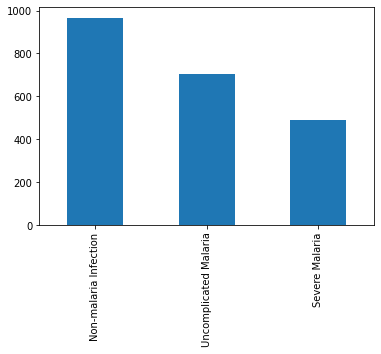

In [ ]:
# plot a bar chat to display the class distribution
subset['Clinical_Diagnosis'].value_counts().plot.bar()

In [ ]:
#descriptive statistics on the data
subset.iloc[:,1:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wbc_count,2156.0,10.723516,5.944994,0.5,6.80,9.30,12.900,53.90
rbc_count,2156.0,3.911679,1.132454,0.5,3.34,4.17,4.650,6.67
hb_level,2156.0,9.423010,2.650261,1.4,7.90,10.20,11.325,18.70
hematocrit,2156.0,29.320223,8.802975,4.3,24.20,31.70,35.500,52.70
mean_cell_volume,2156.0,74.828256,8.046383,7.8,70.00,75.00,80.000,121.00
mean_corp_hb,2156.0,24.142189,3.203595,2.1,22.20,24.10,26.200,38.80
mean_cell_hb_conc,2156.0,32.259318,2.864637,15.7,30.60,32.10,33.425,46.60
platelet_count,2156.0,214.545176,128.697718,3.0,105.00,201.00,300.250,1087.00
platelet_distr_width,2156.0,14.137894,3.064643,0.0,12.90,14.90,15.600,23.90
mean_platelet_vl,2156.0,8.031447,1.194886,3.3,7.20,7.90,8.800,18.60


In [ ]:
#check the correlation for the features
subset.corr()

,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
wbc_count,1.000000,-0.217584,-0.283881,-0.261736,-0.150900,-0.084770,0.066981,0.122330,0.022260,-0.100716,0.093870,-0.090940,-0.057664,0.876999,0.689196,0.715568,0.252208
rbc_count,-0.217584,1.000000,0.896557,0.922294,-0.017848,-0.348335,-0.497615,0.409424,0.001756,0.284809,0.077574,-0.073216,-0.056070,-0.134216,-0.233978,-0.200859,-0.364396
hb_level,-0.283881,0.896557,1.000000,0.968644,0.286931,0.023659,-0.302304,0.353828,0.068770,0.248323,0.162289,-0.158665,-0.093352,-0.153907,-0.338160,-0.273327,-0.562710
hematocrit,-0.261736,0.922294,0.968644,1.000000,0.279029,-0.101461,-0.479766,0.387830,0.091718,0.285169,0.119252,-0.113198,-0.083365,-0.152236,-0.294044,-0.253324,-0.510445
mean_cell_volume,-0.150900,-0.017848,0.286931,0.279029,1.000000,0.722231,-0.077781,-0.002473,0.268485,0.038404,0.094697,-0.079596,-0.111013,-0.080385,-0.168477,-0.199845,-0.413033
mean_corp_hb,-0.084770,-0.348335,0.023659,-0.101461,0.722231,1.000000,0.576017,-0.202177,0.094658,-0.189324,0.149581,-0.151628,-0.062552,-0.011729,-0.152329,-0.106754,-0.334053
mean_cell_hb_conc,0.066981,-0.497615,-0.302304,-0.479766,-0.077781,0.576017,1.000000,-0.310377,-0.187634,-0.329254,0.110667,-0.132823,0.043621,0.089524,-0.016254,0.090089,-0.013497
platelet_count,0.122330,0.409424,0.353828,0.387830,-0.002473,-0.202177,-0.310377,1.000000,0.070121,-0.036139,-0.056902,0.042694,0.089093,0.102714,0.078041,0.143232,-0.104004
platelet_distr_width,0.022260,0.001756,0.068770,0.091718,0.268485,0.094658,-0.187634,0.070121,1.000000,0.233941,0.001142,0.018399,-0.085652,0.015390,0.037808,-0.045928,-0.087467
mean_platelet_vl,-0.100716,0.284809,0.248323,0.285169,0.038404,-0.189324,-0.329254,-0.036139,0.233941,1.000000,-0.055283,0.052658,0.037840,-0.118462,-0.021988,-0.058788,-0.112433


<AxesSubplot:>

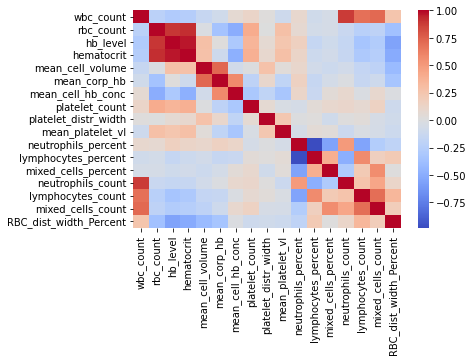

In [ ]:
#lets visualize the correlation matrix using seaborn
sns.heatmap(subset.corr(),cmap='coolwarm')

In [ ]:
#Data preprocessing
# separate the labels/classes from the features/measurement
X=subset.iloc[:,1:]
y=subset.iloc[:,0]

In [ ]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this.
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [ ]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
#Normalize the data

from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

In [ ]:
#Random Forest Classifier
#because we are dealing with multiclass data and so, the one versus rest strategy is used.
#learn to predict each class against the other.

RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_norm,y_train)
y_pred =RF.predict(X_test_norm)
pred_prob = RF.predict_proba(X_test_norm)

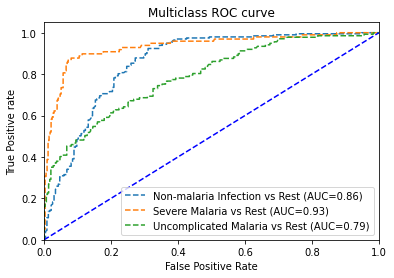

In [ ]:
#Plot the ROC curve

#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.
#This curve plots two parameters: True Positive Rate. False Positive Rate.

from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()